<a href="https://colab.research.google.com/github/wannatrynewnbm/tsf-grip-internship-task/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TSF - GRIP**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP**

**Done by: NAYANA BM**

**Task 2 : Prediction Using Unsupervised ML (K Means Clustering)**

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Iris Dataset: https://bit.ly/3kXTdox

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
#Loading iris dataset
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:

#First 5 row entries of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Clustering**

It attempts to identify a relationship between n-observations( data points) without being trained by the response variable.


**K-means algorithm**
 
It identifies k number of centroids, and allocates every data point to the nearest cluster, while keeping the centroids as small as possible.The ‘means’ in the K-means refers to finding the centroid.

In [ ]:
# To find the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wss =[] 
X=df.iloc[:,0:4].values
for i in range(1, 11): 
    KM = KMeans(n_clusters = i,init = 'k-means++',max_iter = 500, n_init=10 ,random_state=0) 
    KM.fit(X) 
      
    wss.append(KM.inertia_)

**Elbow Method**

It calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

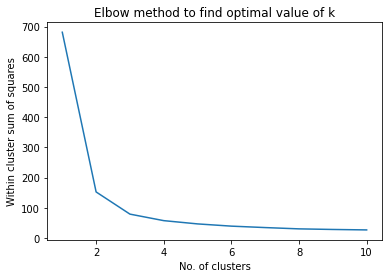

In [ ]:
#Determine optimal k with a line graph
plt.plot(range(1, 11), wss)
plt.title('Elbow method to find optimal value of k')
plt.xlabel('No. of clusters')
plt.ylabel('Within cluster sum of squares') 
plt.show()

In [ ]:
#Applying k means to the dataset & Creating the k means classifier
KM = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 500, n_init=10 ,random_state=0) 
y_KM=KM.fit_predict(X)

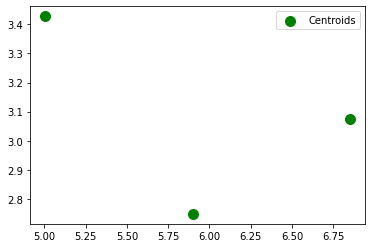

In [ ]:
# To plot the centroids of the clusters
plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()

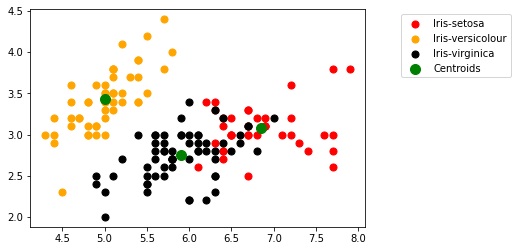

In [ ]:
#Visualising the clusters 

plt.scatter(X[y_KM == 0, 0], X[y_KM == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_KM == 1, 0], X[y_KM == 1, 1], 
            s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_KM == 2, 0], X[y_KM == 2, 1],
            s = 50, c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend(loc="best",bbox_to_anchor=(0.5, 0.5,0.95,0.5))